<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/MBoltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

In [3]:
# Garantisce la compatibilità di alcune funzioni tra Python 2 e Python 3
from __future__ import print_function, division

# importazione dei pacchetti compilati già visti in Python Bootcamp
import numpy as np
import scipy as sp
from scipy import stats

# pylab serve per i plotting
import pylab as pl

#questa linea di codice non serve su colab (utile su HPC e su diverse piattaforme)
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [1]:
# questo è come viene scritto in Python 2, ora si usa Python 3
# print "Hello World"
# normalmente si scrive come function
print ("Hello World")

Hello World


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution) with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

In [13]:
# questa stringa mi da la signature e la docstring della funzione chi
# i metodi sono ad esempio la PDF e CDF. Noi vogliamo generare
# variabili estratte da questa distribuzione, cioè usiamo:
# rvs(df, loc=0, scale=1, size=1, random_state=Non)

# dove df sono i degrees of freedom
# dove scale è il mio scaling parameter
sp.stats.chi?

Text(0.5, 0, 'Speed of particles in the simulation')

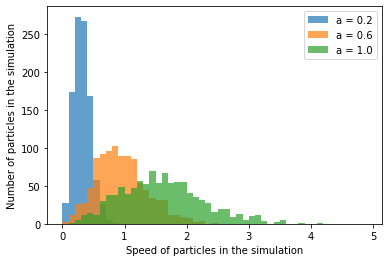

In [11]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend();
# your code to add labels here

pl.ylabel("Number of particles in the simulation")
pl.xlabel("Speed of particles in the simulation")

In [14]:
sp.stats.chi.rvs(df=3, scale=1.0, size=1000).mean()

1.5605538027717343

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)
 

Your answer here:

La risposta corretta è che lo scaling parameter segue la legge di proporzionalità **$a \propto \sqrt{T}$**, in quanto al crescere della temperatura, la velocità quadratica media delle particelle calcolata nel punto 3 cresce al crescere di T, e ciò è coerente con il teorema di equipartizione dell'energia, in cui si ha che:

**$\langle K \rangle = \frac{3}{2}nKT$**

In particolare, si ha che:

**$v_{q.mean}=\sqrt{\langle v^2 \rangle} = \sqrt{ \frac{3nKT}{m} } $**

Ed essendo che **$v_{q.mean} \propto a$**, allora concludiamo che **$a \propto \sqrt{T}$**




# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**

In [27]:
# your code here

# prova con un modo stupido e brutale

k = 3
a1 = 0.2
meanMB1 = a1*np.sqrt(2)*sp.special.gamma((k+1)/2)/sp.special.gamma(k/2)
a2 = 0.6
meanMB2 = a2*np.sqrt(2)*sp.special.gamma((k+1)/2)/sp.special.gamma(k/2)
a3 = 1
meanMB3 = a3*np.sqrt(2)*sp.special.gamma((k+1)/2)/sp.special.gamma(k/2)

meanexpMB1=sp.stats.chi.rvs(df=3, scale=0.2, size=1000).mean()
meanexpMB2=sp.stats.chi.rvs(df=3, scale=0.6, size=1000).mean()
meanexpMB3=sp.stats.chi.rvs(df=3, scale=1.0, size=1000).mean()

meanMB= [meanMB1, meanMB2, meanMB3]
meanexpMB= [meanexpMB1, meanexpMB2, meanexpMB3]


In [45]:
# modo più giusto mediante functions

def meanMB(a):
  """
  Utility function to calculate mean of chi square distribution
  Input:
  a -> (float or int) scaling parameters of MB distribution
  k -> (int) number of degrees of freedom
  Return:
  mean of the distribution
  """
  return 2*a*np.sqrt(2/np.pi)

def chi_mean(a,k):
  """
  Utility function to calculate mean of chi square distribution
  Input:
  a -> (float or int) scaling parameters of chi2 distribution
  k -> (int) number of degrees of freedom
  Return:
  mean of the distribution
  """
  return a*np.sqrt(2)*sp.special.gamma((k+1)/2)/sp.special.gamma(k/2)

for a in [0.2, 0.6, 1.0]:
  print("from theoretical formula for MB function: {0:.2f}".format(meanMB(a)))
  print("from theoretical formula for chi2 function: {0:.2f}".format(chi_mean(a,3)))
  print("from distrubution: {0:.2f}".format(sp.stats.chi.rvs(df=3, scale=a, 
                                    size=1000, random_state=323).mean()))


from theoretical formula for MB function: 0.32
from theoretical formula for chi2 function: 0.32
from distrubution: 0.32
from theoretical formula for MB function: 0.96
from theoretical formula for chi2 function: 0.96
from distrubution: 0.96
from theoretical formula for MB function: 1.60
from theoretical formula for chi2 function: 1.60
from distrubution: 1.60


In [41]:
sp.special.gamma?

This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [ ]:
# your code here